# Detecting Outlier

[Reference](https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer/notebook) <br>
[Data Source](https://www.kaggle.com/datasets/neuromusic/avocado-prices?datasetId=30292&sortBy=voteCount)

In [2]:
import os
import pandas as pd
import numpy as np
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import matplotlib.pyplot as pl
import seaborn as sns
data = pd.read_csv('avocado.csv')

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [49]:
# 1. HYPOTHESIS TESTING(GRUBBS TEST)

import numpy as np
import scipy.stats as stats
x = np.array([12,13,14,19,21,23,26])
y = data['AveragePrice']

def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",round(g_calculated, 5))
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",round(g_critical,5))
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")
grubbs_test(x)
grubbs_test(y)

Grubbs Calculated Value: 1.54097
Grubbs Critical Value: 2.01997
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers

Grubbs Calculated Value: 4.57954
Grubbs Critical Value: 4.68807
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers



In [50]:
# 2. Z-SCORE METHOD

import pandas as pd
import numpy as np
train = pd.read_csv('avocado.csv')

out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
    
sd_x = np.std(train['AveragePrice'])
print(sd_x)
Zscore_outlier(train['AveragePrice'])

0.4026655225054672
Outliers: [2.79, 2.66, 2.74, 2.79, 2.73, 2.73, 2.77, 2.71, 2.73, 2.72, 2.76, 2.75, 2.67, 2.68, 2.76, 2.85, 3.03, 2.91, 2.65, 2.62, 2.62, 2.65, 2.82, 2.74, 2.73, 2.67, 2.67, 2.88, 2.94, 2.99, 3.12, 3.25, 2.93, 2.72, 2.64, 2.73, 2.89, 2.93, 2.79, 2.83, 2.75, 2.62, 2.78, 2.79, 2.64, 2.65, 2.63, 2.71, 2.75, 2.62, 2.67, 2.82, 2.77, 2.8, 2.82, 2.83, 2.73, 2.62, 2.67, 2.67, 2.62, 2.67, 2.62, 2.99, 2.64, 2.62, 2.81, 3.05, 2.87, 2.65, 2.83, 2.71, 2.85, 2.86, 2.81, 2.83, 2.84, 2.84, 2.85, 2.85, 3.0, 2.92, 2.89, 2.97, 3.04, 2.65, 2.63, 2.76, 2.73, 3.0, 2.93, 2.66, 2.76, 2.77, 2.72, 2.73, 2.65, 2.64, 2.83, 2.88, 2.9, 2.92, 2.7, 2.7, 2.69, 2.8, 2.86, 2.83, 2.86, 2.87, 2.89, 2.96, 2.87, 2.65, 2.65, 2.74, 2.88, 2.95, 2.94, 2.86, 2.93, 2.84, 2.76, 2.66, 2.71, 2.69, 2.81, 2.84, 2.64, 2.7, 3.17]


In [56]:
# 3. ROBUST Z-SCORE

import pandas as pd
import numpy as np
train = pd.read_csv('avocado.csv')
out=[]
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_abs_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
    
ZRscore_outlier(train['AveragePrice'])

Outliers: [2.79, 2.66, 2.74, 2.79, 2.73, 2.73, 2.77, 2.71, 2.73, 2.72, 2.76, 2.75, 2.67, 2.68, 2.76, 2.85, 3.03, 2.91, 2.65, 2.62, 2.62, 2.65, 2.82, 2.74, 2.73, 2.67, 2.67, 2.88, 2.94, 2.99, 3.12, 3.25, 2.93, 2.72, 2.64, 2.73, 2.89, 2.93, 2.79, 2.83, 2.75, 2.62, 2.78, 2.79, 2.64, 2.65, 2.63, 2.71, 2.75, 2.62, 2.67, 2.82, 2.77, 2.8, 2.82, 2.83, 2.73, 2.62, 2.67, 2.67, 2.62, 2.67, 2.62, 2.99, 2.64, 2.62, 2.81, 3.05, 2.87, 2.65, 2.83, 2.71, 2.85, 2.86, 2.81, 2.83, 2.84, 2.84, 2.85, 2.85, 3.0, 2.92, 2.89, 2.97, 3.04, 2.65, 2.63, 2.76, 2.73, 3.0, 2.93, 2.66, 2.76, 2.77, 2.72, 2.73, 2.65, 2.64, 2.83, 2.88, 2.9, 2.92, 2.7, 2.7, 2.69, 2.8, 2.86, 2.83, 2.86, 2.87, 2.89, 2.96, 2.87, 2.65, 2.65, 2.74, 2.88, 2.95, 2.94, 2.86, 2.93, 2.84, 2.76, 2.66, 2.71, 2.69, 2.81, 2.84, 2.64, 2.7, 3.17]


In [57]:
# 4. IQR Method

import pandas as pd
import numpy as np
train = pd.read_csv('avocado.csv')
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)

iqr_outliers(train['AveragePrice'])

Outliers: [2.58, 2.79, 2.66, 2.59, 2.74, 2.79, 2.73, 2.73, 2.77, 2.71, 2.73, 2.72, 2.76, 2.75, 2.58, 2.54, 2.67, 2.68, 2.57, 2.76, 2.85, 3.03, 2.91, 2.65, 2.62, 2.62, 2.55, 2.52, 2.61, 2.54, 2.65, 2.82, 2.51, 2.74, 2.73, 2.56, 2.57, 2.67, 2.67, 2.88, 2.94, 2.99, 3.12, 3.25, 2.93, 2.72, 2.64, 2.73, 2.89, 2.51, 2.57, 2.93, 2.79, 2.83, 2.55, 2.75, 2.56, 2.54, 2.59, 2.59, 2.59, 2.62, 2.78, 2.79, 2.64, 2.65, 2.63, 2.71, 2.75, 2.62, 2.55, 2.57, 2.57, 2.54, 2.51, 2.54, 2.67, 2.82, 2.55, 2.77, 2.8, 2.82, 2.83, 2.5, 2.53, 2.58, 2.73, 2.62, 2.67, 2.67, 2.61, 2.62, 2.5, 2.67, 2.62, 2.58, 2.51, 2.6, 2.57, 2.55, 2.99, 2.57, 2.58, 2.59, 2.64, 2.62, 2.81, 2.59, 3.05, 2.87, 2.65, 2.83, 2.71, 2.85, 2.86, 2.81, 2.83, 2.84, 2.84, 2.85, 2.57, 2.53, 2.85, 3.0, 2.92, 2.89, 2.97, 3.04, 2.65, 2.51, 2.55, 2.63, 2.61, 2.76, 2.73, 2.5, 2.52, 2.5, 2.57, 3.0, 2.93, 2.57, 2.59, 2.66, 2.76, 2.77, 2.72, 2.73, 2.65, 2.64, 2.54, 2.58, 2.56, 2.59, 2.54, 2.59, 2.83, 2.88, 2.9, 2.92, 2.52, 2.58, 2.59, 2.7, 2.7, 2.58, 2.54

In [58]:
# 5. WINSORIZATION METHOD (PERCENTILE CAPPING)

import pandas as pd
import numpy as np
train = pd.read_csv('avocado.csv')
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
    
Winsorization_outliers(train['AveragePrice'])

Outliers: [0.65, 0.62, 0.66, 0.49, 0.53, 0.66, 0.56, 0.62, 0.6, 0.65, 0.58, 0.66, 0.56, 0.54, 0.53, 0.52, 0.56, 0.58, 0.6, 0.53, 0.51, 0.66, 0.57, 0.57, 0.6, 0.63, 0.6, 0.64, 0.56, 0.61, 0.61, 0.65, 0.63, 0.63, 0.65, 0.58, 0.61, 0.63, 0.65, 0.65, 0.65, 0.63, 0.6, 0.66, 0.6, 0.63, 0.65, 0.54, 0.64, 0.62, 0.65, 0.58, 0.64, 0.59, 0.63, 0.58, 0.58, 0.58, 0.64, 0.56, 0.63, 0.64, 0.58, 0.64, 0.6, 0.62, 0.58, 0.55, 0.57, 0.62, 0.54, 0.61, 0.56, 0.61, 0.54, 0.56, 0.64, 0.51, 0.57, 0.61, 0.55, 0.64, 0.61, 0.59, 0.62, 0.61, 0.65, 0.62, 0.56, 0.6, 0.65, 0.65, 0.64, 0.65, 0.65, 0.53, 0.58, 0.55, 0.53, 0.57, 0.51, 0.54, 0.64, 0.53, 0.6, 0.62, 0.6, 0.66, 0.61, 0.64, 0.6, 0.65, 0.65, 0.57, 0.65, 0.65, 0.54, 0.46, 0.58, 0.54, 0.6, 0.63, 0.63, 0.65, 0.62, 0.64, 0.66, 0.65, 0.52, 0.56, 0.58, 0.56, 0.59, 0.58, 0.61, 0.59, 0.64, 0.59, 0.65, 2.58, 2.79, 2.66, 2.59, 2.74, 2.79, 2.73, 2.73, 2.77, 2.71, 2.73, 2.72, 2.76, 2.75, 2.58, 0.64, 0.66, 2.67, 2.68, 2.57, 2.76, 2.85, 3.03, 2.91, 2.65, 2.62, 2.62, 2.55,

In [60]:
# 6. DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)

import pandas as pd
from sklearn.cluster import DBSCAN
train = pd.read_csv('avocado.csv')
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))

DB_outliers(train['AveragePrice']) 

0    18249
Name: cluster, dtype: int64


In [65]:
# 7. ISOLATION FOREST

from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
train = pd.read_csv('avocado.csv')
def Iso_outliers(df):
    iso = IsolationForest(random_state = 1, contamination= 'auto')
    preds = iso.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False))

Iso_outliers(train['AveragePrice']) 

 1    14894
-1     3355
Name: cluster, dtype: int64


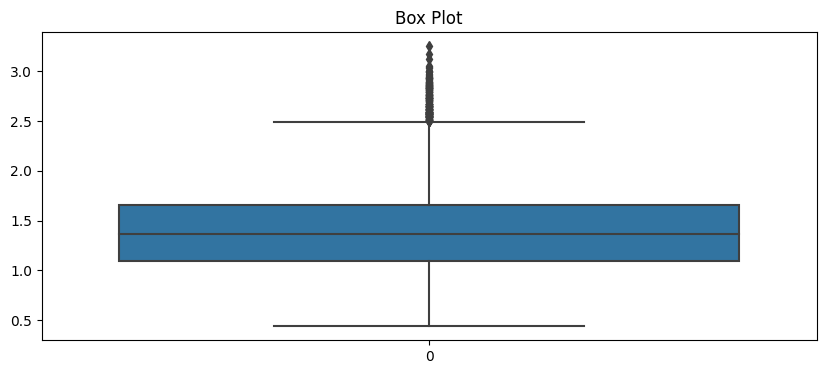

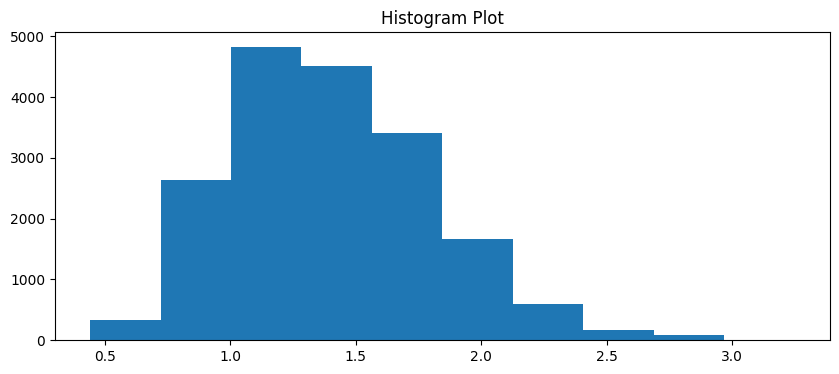

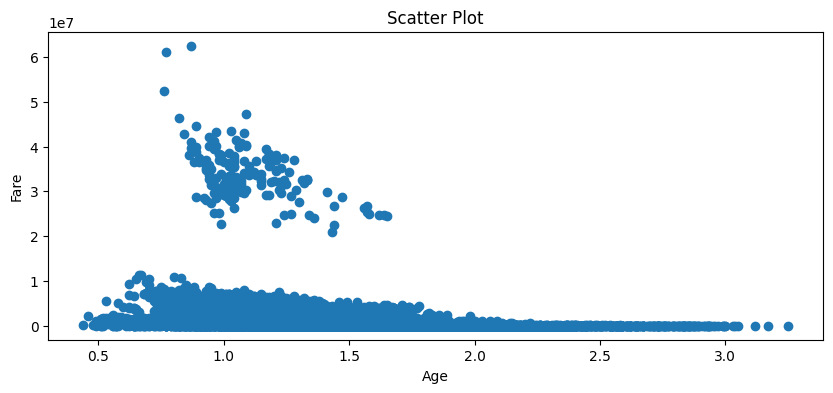

C:\Users\duong\AppData\Local\Temp\ipykernel_8912\524004562.py:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


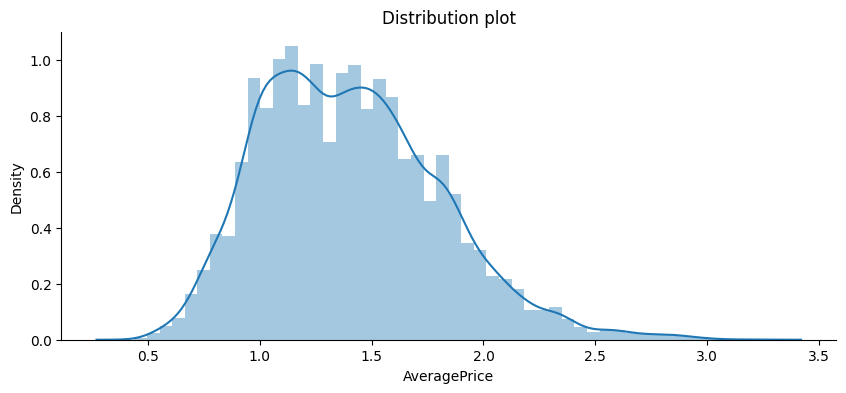

<Figure size 1000x400 with 0 Axes>

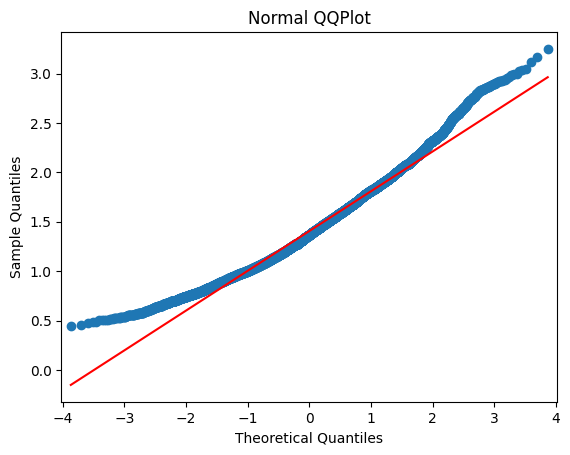

In [1]:
# 8. VISUALIZING THE DATA

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
train = pd.read_csv('avocado.csv')
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(train['AveragePrice'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(train['AveragePrice'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(train['AveragePrice'],train['Total Volume'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(train['AveragePrice'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(train['AveragePrice'])

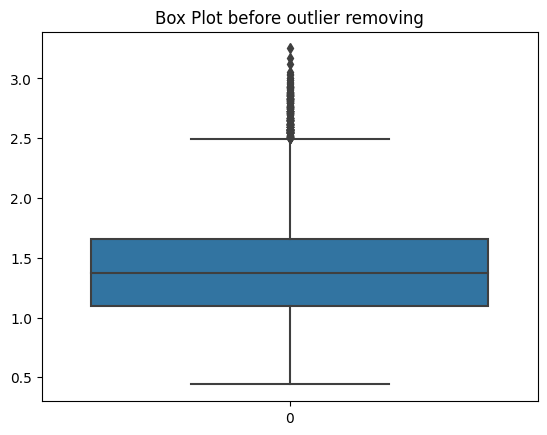

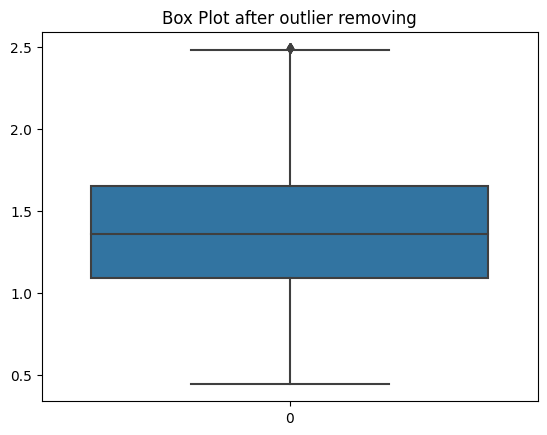

In [1]:
# DELETING OUTLIERS BASED ON INTERQUARTILE RANGE

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
train = pd.read_csv('avocado.csv')
sns.boxplot(train['AveragePrice'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
    
drop_outliers(train, 'AveragePrice')
sns.boxplot(train['AveragePrice'])
plt.title("Box Plot after outlier removing")
plt.show()

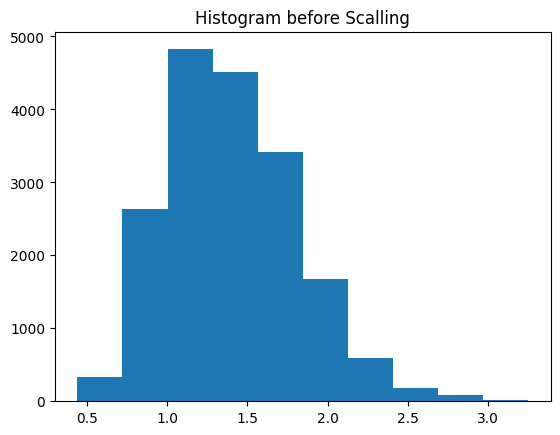

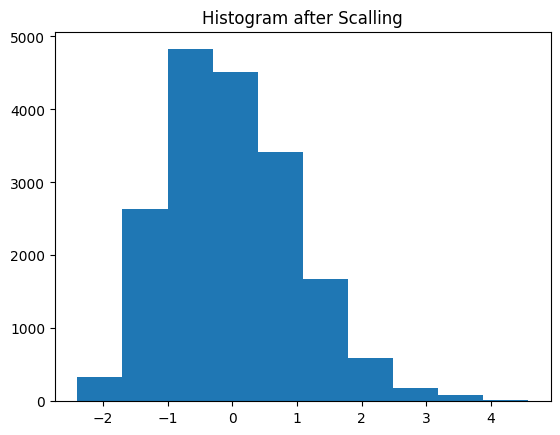

In [6]:
#Scalling
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

train = pd.read_csv('avocado.csv')
plt.hist(train['AveragePrice'])
plt.title("Histogram before Scalling")
plt.show()

scaler = preprocessing.StandardScaler()
train['AveragePrice'] = scaler.fit_transform(train['AveragePrice'].values.reshape(-1,1))
plt.hist(train['AveragePrice'])
plt.title("Histogram after Scalling")
plt.show()

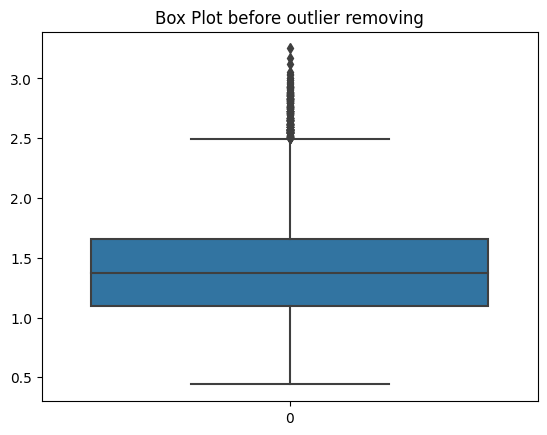

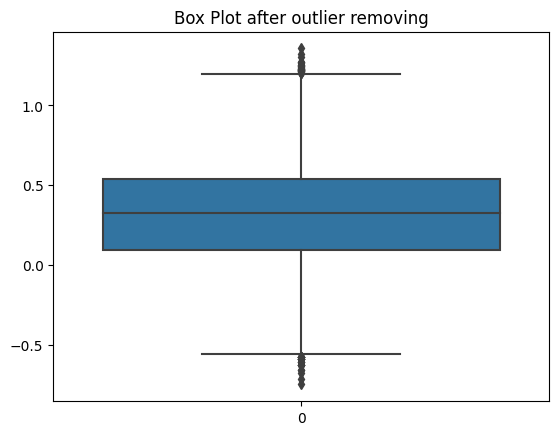

In [7]:
#Box-transformation

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy

train = pd.read_csv('avocado.csv')

sns.boxplot(train['AveragePrice'])
plt.title("Box Plot before outlier removing")
plt.show()
train['AveragePrice'],fitted_lambda= scipy.stats.boxcox(train['AveragePrice'] ,lmbda=None)

sns.boxplot(train['AveragePrice'])
plt.title("Box Plot after outlier removing")
plt.show()

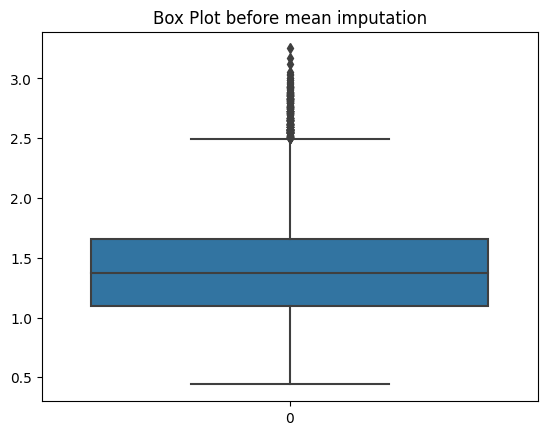

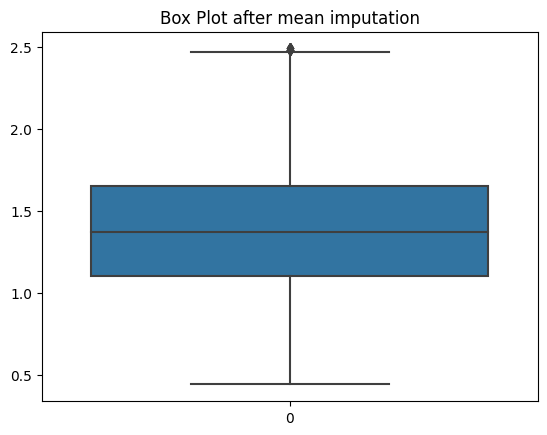

In [10]:
#mean imputation
import pandas as pd
import numpy as np
train = pd.read_csv('avocado.csv')
sns.boxplot(train['AveragePrice'])
plt.title("Box Plot before mean imputation")
plt.show()

q1 = train['AveragePrice'].quantile(0.25)
q3 = train['AveragePrice'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(train['AveragePrice'])
for i in train['AveragePrice']:
    if i > Upper_tail or i < Lower_tail:
            train['AveragePrice'] = train['AveragePrice'].replace(i, m)
            
sns.boxplot(train['AveragePrice'])
plt.title("Box Plot after mean imputation")
plt.show()   

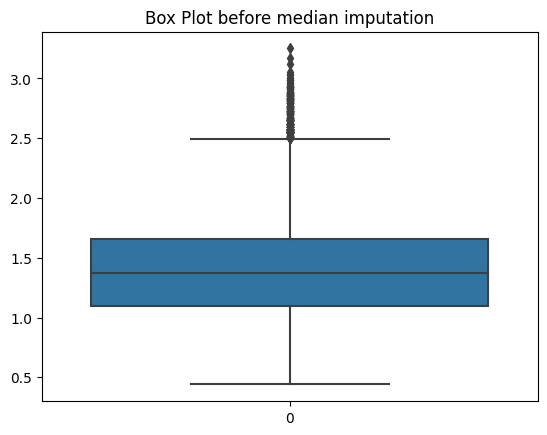

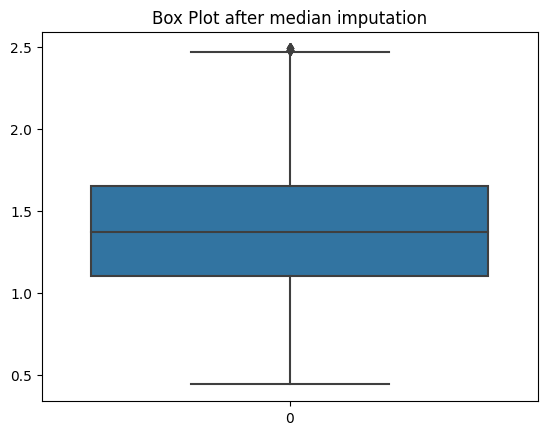

In [11]:
#median imputation
import pandas as pd
import numpy as np
train = pd.read_csv('avocado.csv')
sns.boxplot(train['AveragePrice'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = train['AveragePrice'].quantile(0.25)
q3 = train['AveragePrice'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['AveragePrice'])
for i in train['AveragePrice']:
    if i > Upper_tail or i < Lower_tail:
            train['AveragePrice'] = train['AveragePrice'].replace(i, med)
sns.boxplot(train['AveragePrice'])
plt.title("Box Plot after median imputation")
plt.show()

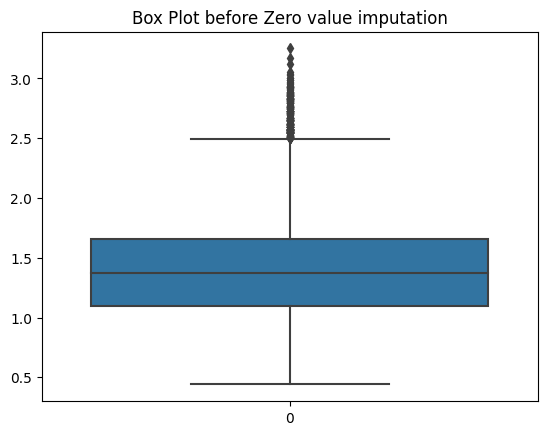

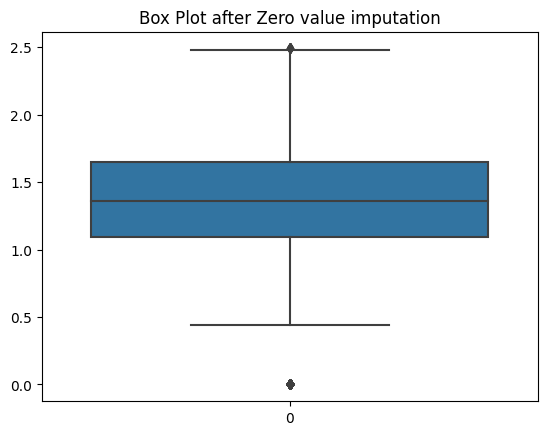

In [12]:
# Zero value imputation
import pandas as pd
import numpy as np
train = pd.read_csv('avocado.csv')

sns.boxplot(train['AveragePrice'])
plt.title("Box Plot before Zero value imputation")
plt.show()
q1 = train['AveragePrice'].quantile(0.25)
q3 = train['AveragePrice'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

for i in train['AveragePrice']:
    if i > Upper_tail or i < Lower_tail:
            train['AveragePrice'] = train['AveragePrice'].replace(i, 0)
            
sns.boxplot(train['AveragePrice'])
plt.title("Box Plot after Zero value imputation")
plt.show()